In [1]:
%matplotlib inline
import mir_eval, librosa, librosa.display, numpy, matplotlib.pyplot as plt, IPython.display as ipd

In [2]:
plt.style.use('seaborn-v0_8-muted')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

[&larr; Back to Index](index.html)

# Evaluation Example: Beat Tracking

[Documentation: `mir_eval.beat`](http://craffel.github.io/mir_eval/#module-mir_eval.beat)

Evaluation method: compute the error between the estimated beat times and some reference list of beat locations. Many metrics additionally compare the beat sequences at different metric levels in order to deal with the ambiguity of tempo.

Let's evaluate a beat detector on the following audio:

In [3]:
y, sr = librosa.load('audio/prelude_cmaj.wav')

In [4]:
ipd.Audio(y, rate=sr)

## Detect Beats

Estimate the beats using `beat_track`:

In [5]:
est_tempo, est_beats = librosa.beat.beat_track(y=y, sr=sr, bpm=120)
est_beats = librosa.frames_to_time(est_beats, sr=sr)

In [6]:
est_beats

array([0.55727891, 1.021678  , 1.53251701, 1.9969161 , 2.48453515,
       2.9721542 , 3.43655329, 3.90095238, 4.41179138, 4.89941043,
       5.38702948, 5.85142857, 6.33904762, 6.82666667, 7.29106576])

Load a fictional reference annotation.

In [7]:
ref_beats = numpy.array([0, 0.50, 1.02, 1.53, 1.99, 2.48, 2.97,
       3.43, 3.90, 4.41, 4.89, 5.38,
       5.85, 6.33, 6.82, 7.29, 7.70])

Plot the estimated and reference beats together.

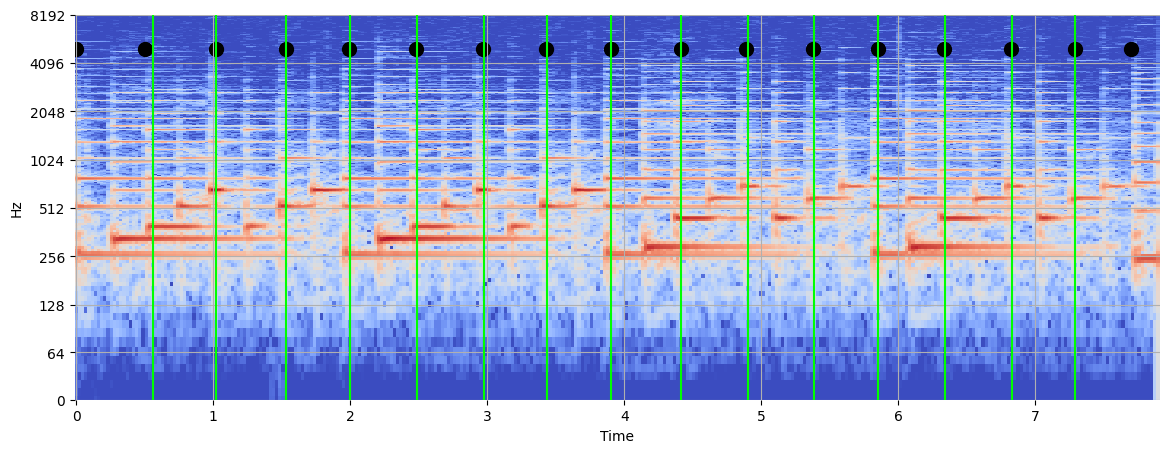

In [8]:
D = librosa.stft(y)
S = abs(D)
S_db = librosa.amplitude_to_db(S)
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.ylim(0, 8192)
plt.vlines(est_beats, 0, 8192, color='#00ff00')
plt.scatter(ref_beats, 5000*numpy.ones_like(ref_beats), color='k', s=100);

## Evaluate

Evaluate using [`mir_eval.beat.evaluate`](https://github.com/craffel/mir_eval/blob/master/mir_eval/beat.py#L704):

In [9]:
mir_eval.beat.evaluate(ref_beats, est_beats)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

## Example: Chord Estimation

In [ ]:
mir_eval.chord.evaluate()

Hidden benefits

- Input validation! Many errors can be traced back to ill-formatted data.
- Standardized behavior, full test coverage.

## More than metrics

mir_eval has tools for display and sonification.

In [ ]:
import librosa.display
import mir_eval.display

Common plots: `events`, `labeled_intervals`

pitch, multipitch, piano_roll
segments, hierarchy,
separation

### Example: Events

In [ ]:
librosa.display.specshow(S, x_axis='time', y_axis='mel')
mir_eval.display.events(ref_beats, color='w', alpha=0.8, linewidth=3)
mir_eval.display.events(est_beats, color='c', alpha=0.8, linewidth=3, linestyle='--')

### Example: Labeled Intervals

### Example: Source Separation

In [ ]:
y_harm, y_perc = librosa.effects.hpss(y, margin=8)

In [ ]:
plt.figure(figsize=(12, 4))
mir_eval.display.separation([y_perc, y_harm], sr, labels=['percussive', 'harmonic'])
plt.legend()

In [ ]:
Audio(data=numpy.vstack([

In [ ]:
mir_eval.sonify.chords()

[&larr; Back to Index](index.html)